## Imports

In [1]:
from constants import TRAIN_CNN_FLUXES_PATH, \
                      TRAIN_CNN_AMP_PHASE_PATH, \
                      VALIDATION_CNN_FLUXES_PATH, \
                      VALIDATION_CNN_AMP_PHASE_PATH

from data_utils import load_numpy_data

from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_fully_connected_amp_phase_prediction, \
                       plot_conv_amp_phase_prediction

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           create_convolutional_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model_with_generator, \
                           store_model

from configurations import SimpleConvolutional as ModelConfiguration

2024-02-12 09:59:49.996190: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 09:59:50.051853: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 09:59:50.051892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 09:59:50.053318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 09:59:50.062365: I tensorflow/core/platform/cpu_feature_guar

## Load data

In the first place, define the data paths

In [2]:
validation_fluxes_array = load_numpy_data(VALIDATION_CNN_FLUXES_PATH)
validation_amp_phase_array = load_numpy_data(VALIDATION_CNN_AMP_PHASE_PATH)

## CONVOLUTIONAL MODEL

In [3]:
model_configuration = ModelConfiguration()
print(model_configuration.get_description())

2024-02-12 09:59:52.469260: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355



	=== SC70000Shuffle ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Convolutional
		-Input shape: (55, 24, 1)
		-Output shape: (96, 96, 2)
		-Convolutional Layers: [128, 256, 512]
		-Convolutonal Kernels: [(3, 3), (3, 3), (3, 3)]
		-Fully Connected Hidden layers: [4096, 2048, 2048, 1024, 1024, 1024]
		-Regularizer: None
		-Convolutional Activation: relu
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: True
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 200
		-Batch size: 32
		-Callbacks:
			-ReduceLROnPlateau: MSE 15 x0.1
			-Early Stop: MSE 50
	


2024-02-12 09:59:52.569826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 09:59:52.570505: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 09:59:52.584332: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
model = create_convolutional_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "SC70000Shuffle"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 22, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 11, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 9, 256)        295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 4, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 2, 512)        1180160   
                                                                 
 flatten (Flatten)           (None, 10240)          

In [5]:
validation_fluxes_array.shape

(10000, 55, 24)

In [6]:
validation_amp_phase_array.shape

(10000, 96, 96, 2)

In [7]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [8]:
history = train_model_with_generator(
    model,
    TRAIN_CNN_FLUXES_PATH,
    TRAIN_CNN_AMP_PHASE_PATH,
    validation_fluxes_array,
    validation_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters(),
    n_samples=70000,
    do_shuffle=True
)

Epoch 1/200


2024-02-12 09:59:58.338379: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-12 09:59:58.501367: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-12 09:59:59.194549: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-12 10:00:00.167931: I external/local_xla/xla/service/service.cc:168] XLA service 0x8d4deb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-12 10:00:00.168037: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-02-12 10:00:00.195050: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707692400.686739   15690 device_com

2188/2188 [==============================] - 115s 47ms/step - loss: 0.5222 - mean_squared_error: 0.5222 - val_loss: 0.6427 - val_mean_squared_error: 0.6427 - lr: 0.0010
Epoch 2/200
2188/2188 [==============================] - 96s 44ms/step - loss: 0.5190 - mean_squared_error: 0.5190 - val_loss: 0.6248 - val_mean_squared_error: 0.6248 - lr: 0.0010
Epoch 3/200
2188/2188 [==============================] - 95s 43ms/step - loss: 0.5081 - mean_squared_error: 0.5081 - val_loss: 0.8614 - val_mean_squared_error: 0.8614 - lr: 0.0010
Epoch 4/200
2188/2188 [==============================] - 94s 43ms/step - loss: 0.4997 - mean_squared_error: 0.4997 - val_loss: 0.6249 - val_mean_squared_error: 0.6249 - lr: 0.0010
Epoch 5/200
2188/2188 [==============================] - 95s 43ms/step - loss: 0.4962 - mean_squared_error: 0.4962 - val_loss: 0.6244 - val_mean_squared_error: 0.6244 - lr: 0.0010
Epoch 6/200
2188/2188 [==============================] - 94s 43ms/step - loss: 0.4930 - mean_squared_error: 0.4

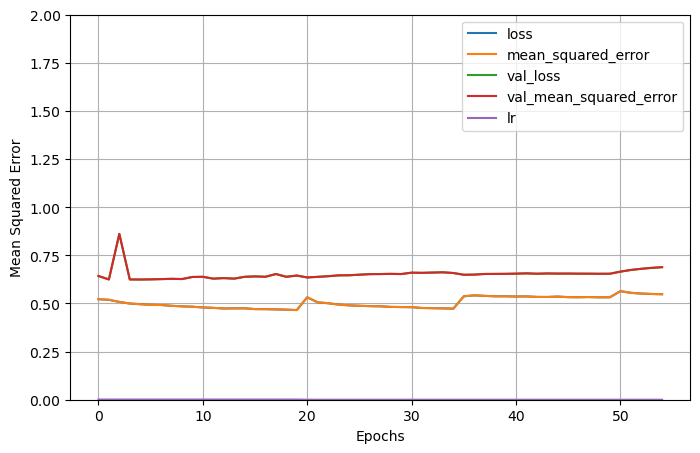

In [9]:
plot_model_history(history)

1/1 [==============================] - 1s 504ms/step


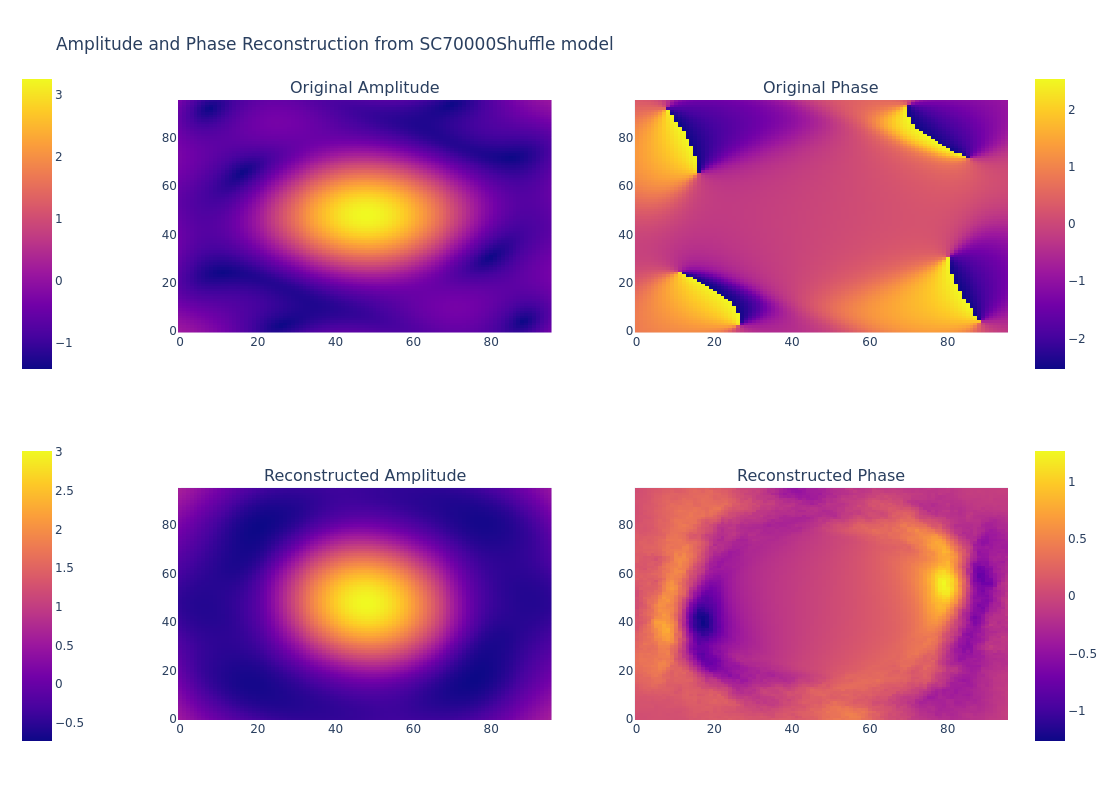

In [10]:
n = 106
plot_conv_amp_phase_prediction(
    model,
    validation_fluxes_array[n],
    validation_amp_phase_array[n]
    )

In [11]:
from constants import TRAIN_CNN_AMP_PHASE_PATH
train_fluxes_array = load_numpy_data(f"{TRAIN_CNN_FLUXES_PATH}00.npy")
train_amp_phase_array = load_numpy_data(f"{TRAIN_CNN_AMP_PHASE_PATH}00.npy")

1/1 [==============================] - 0s 32ms/step


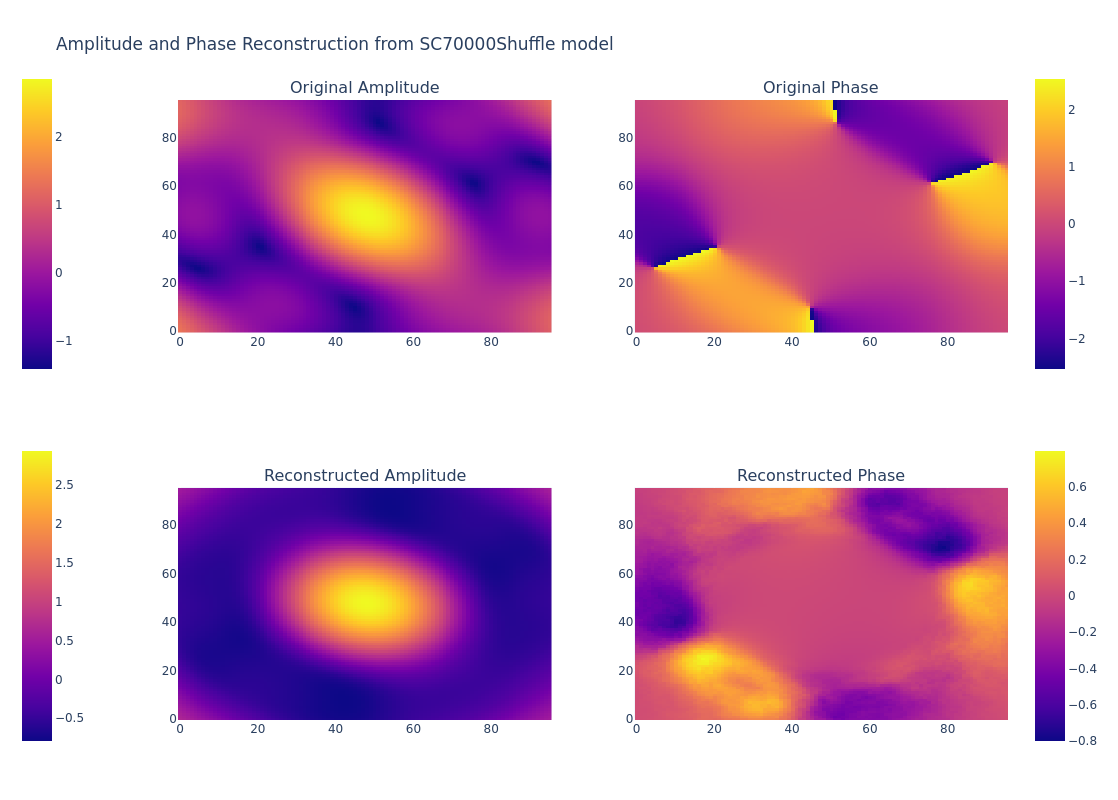

In [12]:
n = 5
plot_conv_amp_phase_prediction(
    model,
    train_fluxes_array[n],
    train_amp_phase_array[n]
    )

In [13]:
store_model(model,
            model.name,
            model_configuration.get_description(),
            history.history['mean_squared_error'][-1],
            history.history['val_mean_squared_error'][-1])